# E-commerce Marketing and Sales Analysis

### 1. Business Context and Problem 

📜 Business Context

The objective of this project is to leverage data-driven insights to enhance customer acquisition, retention, and optimize revenue streams for an e-commerce company.

The focus areas include analyzing transactions, marketing spends, discount strategies, customer behavior, and product performance across a complete calendar year.

## 🎯 Problem Statement

Through exploratory analysis and visualization, we aim to answer key business questions such as:

- Identify months with highest and lowest customer acquisition.
- Analyze retention patterns and customer lifetime value.
- Evaluate coupon effectiveness and marketing ROI.
- Segment customers using RFM analysis to tailor strategies.
- Understand how taxes and delivery charges influence purchasing behaviors.

### 2. Data Description

🗃️ Data Description

The project utilizes multiple datasets covering the period 1st Jan 2019 to 31st Dec 2019:

- Online Sales: Transaction-level sales data including quantity, pricing, and product details.
- Customers Data: Customer demographic information such as gender, location, and tenure.
- Discount Coupons: Information on discount codes and associated percentages across months and categories.
- Marketing Spend: Daily spend data across offline and online marketing channels.
- Tax Amount: GST percentages applicable by product categories.


### 3. Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 4. Data Loading

In [2]:
sales = pd.read_csv('../resources/Online_Sales.csv')
customers = pd.read_excel('../resources/CustomersData.xlsx')
discounts = pd.read_csv('../resources/Discount_Coupon.csv')
marketing = pd.read_csv('../resources/Marketing_Spend.csv')
tax = pd.read_excel('../resources/Tax_amount.xlsx')

### 5. Data Overview and Initial Cleaning
- Missing Values
- Duplicates
- Data Types

In [3]:
print("===INFO===\n")
print(sales.info())
print("\n===IS NULL===\n")
print(sales.isnull().sum())
print("\n===Duplicated===")
print(sales.duplicated().sum())


===INFO===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB
None

===IS NULL===

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price            

In [4]:
print("===INFO===\n")
print(customers.info())
print("\n===IS NULL===\n")
print(customers.isnull().sum())
print("\n===Duplicated===")
print(customers.duplicated().sum())

===INFO===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None

===IS NULL===

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

===Duplicated===
0


In [5]:
print("===INFO===\n")
print(discounts.info())
print("\n===IS NULL===\n")
print(discounts.isnull().sum())
print("\n===Duplicated===")
print(discounts.duplicated().sum())

===INFO===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None

===IS NULL===

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

===Duplicated===
0


In [6]:
print("===INFO===\n")
print(marketing.info())
print("\n===IS NULL===\n")
print(marketing.isnull().sum())
print("\n===Duplicated===")
print(marketing.duplicated().sum())

===INFO===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None

===IS NULL===

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

===Duplicated===
0


In [7]:
print("===INFO===\n")
print(tax.info())
print("\n===IS NULL===\n")
print(tax.isnull().sum())
print("\n===Duplicated===")
print(tax.duplicated().sum())

===INFO===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
None

===IS NULL===

Product_Category    0
GST                 0
dtype: int64

===Duplicated===
0


In [8]:
# Convert dates to datetime object
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'])
marketing['Date'] = pd.to_datetime(marketing['Date'])

In [9]:
# Create new Month columns
sales['Transaction_Month'] = sales['Transaction_Date'].dt.to_period('M')
marketing['Marketing_Month'] = marketing['Date'].dt.to_period('M')

In [10]:
# lower-casing all column names
sales.columns = sales.columns.str.lower()
customers.columns = customers.columns.str.lower()
discounts.columns = discounts.columns.str.lower()
marketing.columns = marketing.columns.str.lower()
tax.columns = tax.columns.str.lower()

In [11]:
sales['revenue'] = sales['quantity'] * sales['avg_price']
sales['total_amount'] = sales['revenue'] + sales['delivery_charges']

In [12]:
# Customer integrity check
# unique customers in sales
sales_customers = set(sales['customerid'].unique())

# unique customers in customer
customers_list = set(customers['customerid'].unique())

missing_customers = sales_customers - customers_list
print(f"No of customers in sales not found in customers table : {len(missing_customers)}")


No of customers in sales not found in customers table : 0


In [13]:
# Saving cleaned data
sales.to_csv('../eda_outputs/sales_cleaned.csv', index=False)
customers.to_csv('../eda_outputs/customers_cleaned.csv', index=False)
discounts.to_csv('../eda_outputs/discounts_cleaned.csv', index=False)
marketing.to_csv('../eda_outputs/marketing_cleaned.csv', index=False)
tax.to_csv('../eda_outputs/tax_cleaned.csv', index=False)

In [14]:
print(sales.columns)
print(customers.columns)
print(discounts.columns)
print(marketing.columns)
print(tax.columns)

Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'transaction_month', 'revenue',
       'total_amount'],
      dtype='object')
Index(['customerid', 'gender', 'location', 'tenure_months'], dtype='object')
Index(['month', 'product_category', 'coupon_code', 'discount_pct'], dtype='object')
Index(['date', 'offline_spend', 'online_spend', 'marketing_month'], dtype='object')
Index(['product_category', 'gst'], dtype='object')


### 6. Exploratory Data Analysis (EDA)
- Customer Acquisition Trends
- Retention Analysis
- Revenue Analysis
- Coupon Usage Analysis
- Top Products Analysis
- Marketing Spend Effectiveness
- Customer Segmentation (RFM)

#### 6.1 Basic Aggregations
- Unique Customers
- Unique Transactions
- Unique Products
- Total Revenue
- Total Amount Collected
- Monthly Revenue Trend

In [15]:
unique_customers = sales['customerid'].nunique()
print(f"Total unique customers in sales : {unique_customers}")

print(f"Unique customer in customers: {customers['customerid'].nunique()}")

unique_transactions = sales['transaction_id'].nunique()
print(f"Unique transactions : {unique_transactions}")

unique_products = sales['product_sku'].nunique()
print(f"Unique products sold : {unique_products}")

total_revenue = sales['revenue'].sum()
print(f"Total revenue (without delivery charges) : ${total_revenue:,.2f}")

total_collected = sales['total_amount'].sum()
print(f"Total Amount Collected (with delivery charges) : ${total_collected:,.2f}")

Total unique customers in sales : 1468
Unique customer in customers: 1468
Unique transactions : 25061
Unique products sold : 1145
Total revenue (without delivery charges) : $4,670,794.62
Total Amount Collected (with delivery charges) : $5,227,429.69


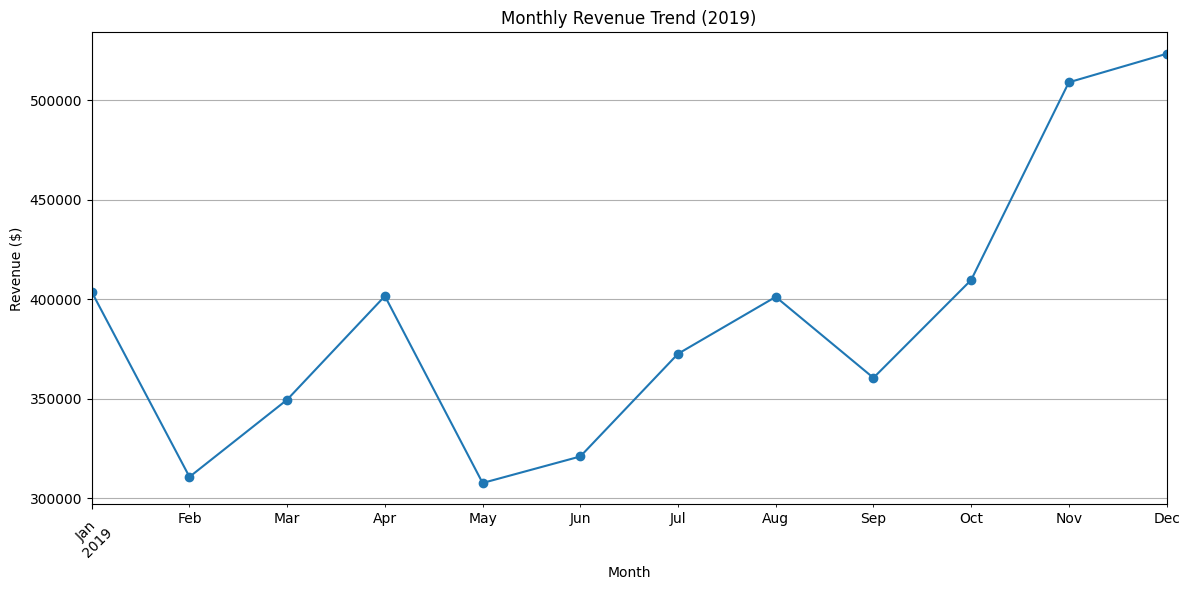

In [16]:
monthly_revenue = sales.groupby('transaction_month')['revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend (2019)')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_revenue_trend.png')  # Save for README later
plt.show()

### 7. Insights and Business Recommendations

#### 7.1 Customer Acquisition Analysis

We define customer acquisition as the first time a customer places an order.  
We then aggregate this data monthly to identify patterns in new customer growth.

In [17]:
# First purchase date per customer
first_purchase = sales.groupby('customerid')['transaction_date'].min().reset_index()

# Add a column for the month of acquisition
first_purchase['acquisition_month'] = first_purchase['transaction_date'].dt.to_period('M')

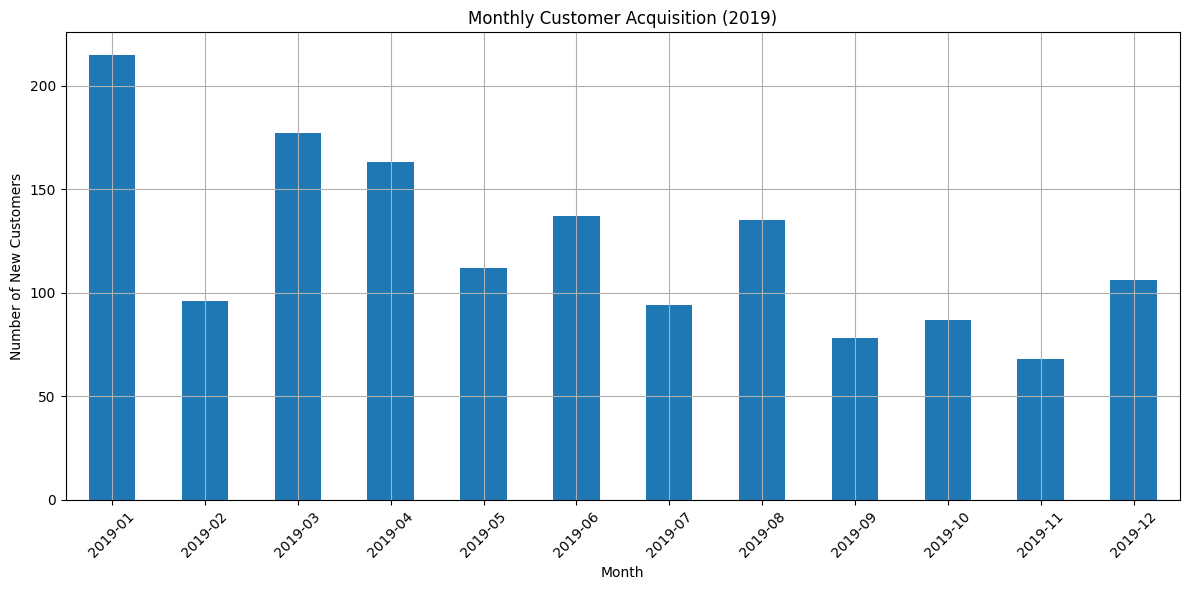

In [18]:
monthly_acquisition = first_purchase['acquisition_month'].value_counts().sort_index()

plt.figure(figsize=(12,6))
monthly_acquisition.plot(kind='bar')
plt.title('Monthly Customer Acquisition (2019)')
plt.ylabel('Number of New Customers')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_customer_acquisition.png')
plt.show()


In [19]:
max_month = monthly_acquisition.idxmax()
min_month = monthly_acquisition.idxmin()
max_value = monthly_acquisition[max_month]
min_value = monthly_acquisition[min_month]
print(f"Highest Acquisition Month: {max_month}. Total acquisition: {max_value}")
print(f"Lowest Acquisition Month: {min_month}, Total acquisition: {min_value}")

Highest Acquisition Month: 2019-01. Total acquisition: 215
Lowest Acquisition Month: 2019-11, Total acquisition: 68


### Key Observations

- January 2019 had the highest customer acquisition with 215 new customers.
- November 2019 had the lowest acquisition with only 68 new customers.
- Acquisition appears to decline gradually over the year, possibly due to lower marketing or seasonal fatigue.

### Business Interpretation

- A strong acquisition push in January might be tied to New Year marketing campaigns or new year sales.
- The sharp drop by November suggests the company may not be capitalizing on seasonal events like Black Friday or Diwali.
- Acquisition levels post-August are consistently lower, indicating a need to re-engage the market.

### Suggested Actions

- Review January marketing and campaign success factors, replicate or A/B test them in Q4.
- Launch aggressive acquisition offers or bundled deals in October–November to offset end-of-year drop.
- Align discount strategies with high-performing acquisition months.

In [20]:
first_purchase

,customerid,transaction_date,acquisition_month
0,12346,2019-09-15,2019-09
1,12347,2019-03-24,2019-03
2,12348,2019-06-22,2019-06
3,12350,2019-12-14,2019-12
4,12356,2019-09-15,2019-09
...,...,...,...
1463,18259,2019-04-05,2019-04
1464,18260,2019-06-22,2019-06
1465,18269,2019-04-05,2019-04
1466,18277,2019-10-23,2019-10


#### 7.2 Customer Retention Analysis

We define retention as a customer making a repeat purchase in any month after their acquisition.  
This cohort analysis helps identify patterns of loyalty and drop-off behavior.

In [21]:
sales = sales.merge(
    first_purchase[['customerid', 'acquisition_month']],
    on='customerid',
    how='left'
)

In [22]:
sales['cohort_index'] = (sales['transaction_month'] - sales['acquisition_month']).apply(lambda x: x.n)

In [23]:
# Count unique customers in each [acquisition_month, cohort_index]
cohort_data = sales.groupby(['acquisition_month', 'cohort_index'])['customerid'].nunique().reset_index()

# Pivot table to form retention matrix
retention_matrix = cohort_data.pivot(index='acquisition_month', columns='cohort_index', values='customerid')

# Normalize by dividing by size at cohort_index 0
retention_rate = retention_matrix.divide(retention_matrix[0], axis=0)

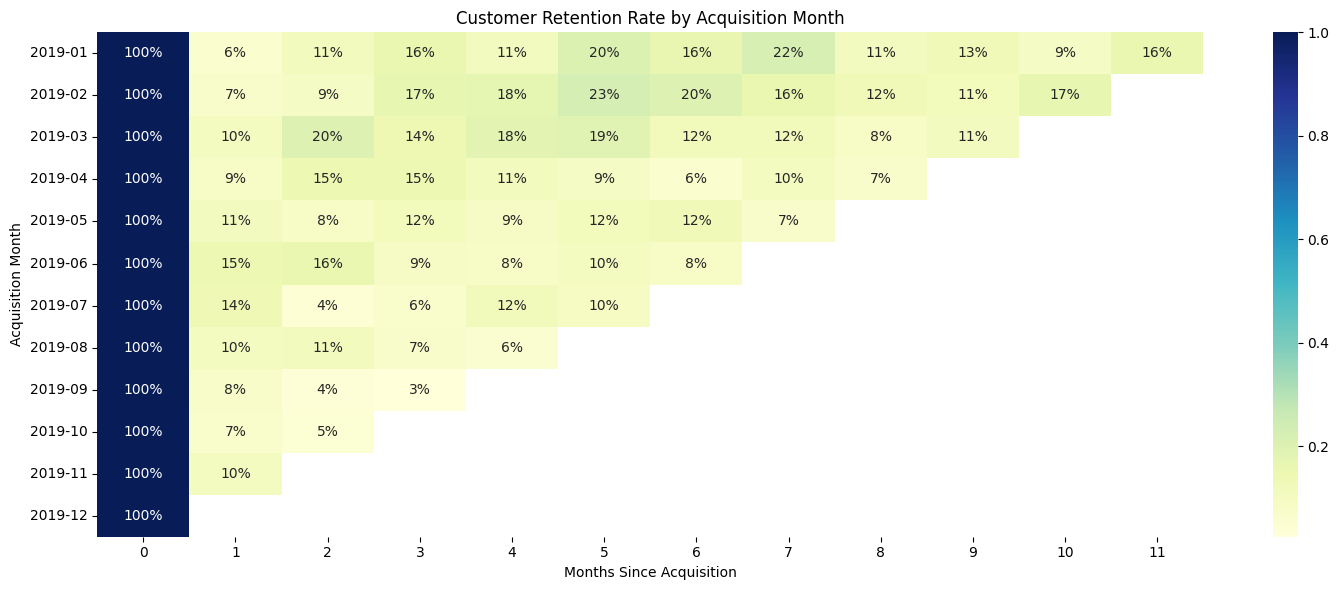

In [24]:
plt.figure(figsize=(15, 6))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Customer Retention Rate by Acquisition Month')
plt.xlabel('Months Since Acquisition')
plt.ylabel('Acquisition Month')
plt.tight_layout()
plt.savefig('../images/customer_retention_heatmap.png')
plt.show()


#### 7.2 Customer Retention Analysis Update

Retention is a critical metric for understanding how well an e-commerce platform keeps customers engaged after their first purchase.

We define **retention** as the customer making **at least one repeat purchase** in a later month after their initial purchase month.

To conduct this, we use a **cohort analysis** approach, where customers are grouped by their **acquisition month** (i.e., their first transaction month), and we track their activity over subsequent months.

---

##### 📊 Cohort Retention Heatmap

The heatmap below displays the **percentage of customers retained** from each acquisition month cohort over time.  
For example, the cell in row **2019-01**, column `2` shows the percentage of customers acquired in January who returned in March (i.e., two months later).

---

##### 🔍 Key Observations

- The **January 2019 cohort** shows the strongest long-term retention, with **~16%** of users returning even after 11 months.
- The **biggest drop-off** in every cohort is immediately after the acquisition month — typically **85–95%** of users do not return the next month.
- Later cohorts (especially **August to November 2019**) show **shorter retention tails** and **faster disengagement**, with few customers returning after 2 months.

---

##### 📌 Business Interpretation

- Early cohorts (Jan–Mar) may have benefited from better onboarding, seasonal offers, or effective first-touch campaigns.
- The significant drop-off after the first month suggests a need for **stronger re-engagement strategies**, such as:
  - Email nudges
  - Loyalty points
  - Exclusive offers
- Shorter tails for Q4 cohorts (Sep–Nov) could imply weaker follow-ups or reduced customer motivation — this is a common pre-holiday behavior unless re-targeted well.

---

##### ✅ Recommended Actions

- Revisit what worked in **January–March** to replicate success in Q4.
- Set up an **automated retention funnel**:
  - Offer targeted discounts or bundles within 30 days of a customer's first order.
  - Send personalized re-engagement emails for high-ticket buyers who go silent.
- For acquisition months with high initial volume but poor retention, perform a **product-category-wise churn analysis**.

---

📁 The retention heatmap has been saved to:  
`images/customer_retention_heatmap.png`


#### 7.3 Revenue Comparison: New vs Existing Customers (MoM)

In [25]:
sales['customer_type'] = np.where(
    sales['transaction_month'] == sales['acquisition_month'],
    'New',
    'Existing'
)

In [26]:
revenue_by_type = sales.groupby(['transaction_month', 'customer_type'])['revenue'].sum().unstack()

<Figure size 1200x600 with 0 Axes>

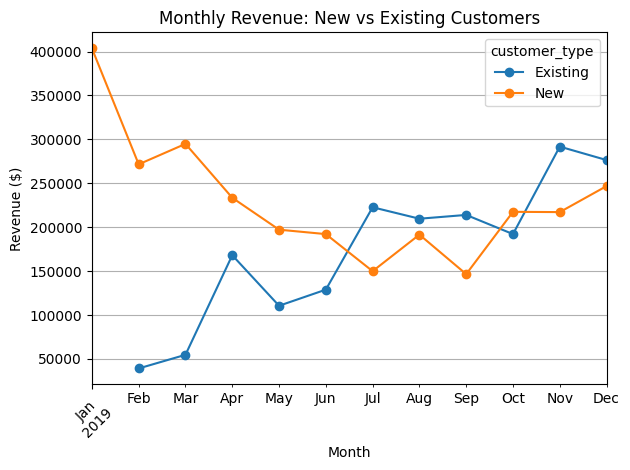

In [27]:
plt.figure(figsize=(12,6))
revenue_by_type.plot(kind='line', marker='o')
plt.title('Monthly Revenue: New vs Existing Customers')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_revenue_new_vs_existing.png')
plt.show()

#### 7.3 Monthly Revenue: New vs Existing Customers

To analyze the relative impact of acquisition vs. retention on revenue, we segmented customers as:
- **New**: Customers making their first purchase in a given month.
- **Existing**: Customers who had purchased in earlier months and returned.

---

##### 📊 Chart: Monthly Revenue Trends

The line plot below compares the monthly revenue generated by new and existing customers throughout 2019.

📁 Saved to: `images/monthly_revenue_new_vs_existing.png`

---

##### 🔍 Key Observations

- **New customers dominated revenue in the first half** of the year — especially in **January**, where they contributed over $400K.
- **Existing customer revenue steadily grew**, surpassing new customers in **July**, and stayed higher for most of Q3 and Q4.
- **November and December** show strong performance from **both segments**, indicating successful reactivation or cross-selling toward year-end.
- There is a **notable dip in new customer revenue during June–September**, while existing customers maintained stable contributions — indicating a loyal base.

---

##### 📌 Business Interpretation

- The company’s **acquisition strategy was strong in early 2019**, but may have lost momentum mid-year.
- The **rise of existing customer revenue** suggests effective retention mechanisms or natural repeat purchases kicking in after 3–6 months.
- **Sustained engagement** from existing customers during off-peak acquisition periods demonstrates the value of focusing on retention.

---

##### ✅ Recommended Actions

- Investigate **January’s acquisition strategy** and replicate similar campaigns in Q4.
- Set up **milestone triggers** (e.g., 30/60/90-day post-purchase offers) to encourage existing customer re-purchases.
- Allocate a portion of the marketing budget toward **loyalty rewards and referrals**, especially during mid-year when acquisition weakens.
- For low new-customer revenue months (like July–Sep), analyze channel performance, landing pages, or promotional gaps.



### 7.4 Summary of Behavioral Insights

Based on our analysis of customer behavior using sales data, we observed:

#### 🧠 Acquisition
- Peak customer acquisition occurred in **January 2019**, likely due to a seasonal push.
- Acquisition steadily declined through the year, hitting the lowest in **November**.

#### 🔁 Retention
- Customers acquired in Q1 showed **better long-term retention**, with January cohort retaining ~16% by year-end.
- Most cohorts experienced sharp drop-off after first month, highlighting the need for early re-engagement.

#### 💸 Revenue Behavior
- Revenue from **new customers** was highest early in the year, particularly in **January**.
- From **July onward**, **existing customers** became the primary revenue drivers.
- This indicates a shift from acquisition-led growth to retention-led stability.

#### 📌 Strategic Insight
- The company appears to have had a strong **acquisition engine early in the year**, followed by **organic retention behavior**.
- However, there’s potential to **strengthen both retention and acquisition in Q3–Q4** using targeted strategies.

---

📁 All visualizations and metrics have been saved in the `/images/` and `/eda_outputs/` folders.

We now transition to **explaining these patterns** using additional datasets like:
- Marketing spend
- Discount campaigns
- Customer demographics
- Category-level taxes


### 8. Causal Analysis: What Drives Customer Behavior?

#### 8.1 Revenue Impact of Coupon Usage (Coupon Usage vs Revenue)

In [28]:
print(sales['coupon_status'].unique())

['Used' 'Not Used' 'Clicked']


In [29]:
sales['coupon_status'] = sales['coupon_status'].str.strip().str.lower()
sales['coupon_used'] = sales['coupon_status'].apply(lambda x: 1 if x == 'used' else 0)


In [30]:
coupon_comparison = sales.groupby('coupon_used')['revenue'].agg(['mean', 'count', 'sum']).rename(index={0: 'No Coupon', 1: 'Used Coupon'})
display(coupon_comparison)

,mean,count,sum
coupon_used,,,
No Coupon,88.805726,35020,3109976.52
Used Coupon,87.177061,17904,1560818.10


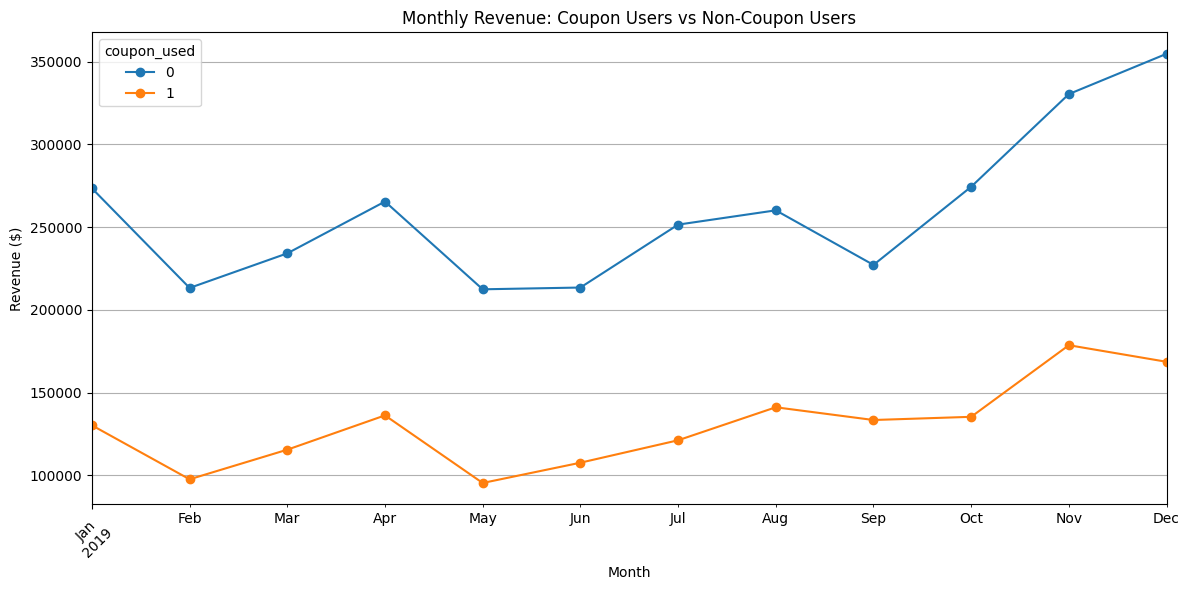

In [31]:
monthly_coupon_revenue = sales.groupby(['transaction_month', 'coupon_used'])['revenue'].sum().unstack()

monthly_coupon_revenue.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Revenue: Coupon Users vs Non-Coupon Users')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_coupon_vs_noncoupon_revenue.png')
plt.show()

In [32]:
discounts['month'] = pd.to_datetime('2019-' + discounts['month'], format='%Y-%b').dt.to_period('M')

sales = sales.merge(
    discounts[['month', 'product_category', 'discount_pct']],
    how='left',
    left_on=['transaction_month', 'product_category'],
    right_on=['month', 'product_category']
)
print(sales['discount_pct'].isnull().mean())

0.007558007709167864


In [33]:
discount_impact = sales[sales['coupon_used'] == 1].groupby('discount_pct')['revenue'].mean()
display(discount_impact)

discount_pct
10.0    87.547703
20.0    85.107820
30.0    89.364712
Name: revenue, dtype: float64

#### 8.1.1 Impact of Discount % on Revenue (Coupon Users)

We merged the discount metadata with the sales data by `transaction_month` and `product_category` to analyze the effect of discount percentage on revenue.

##### 📊 Results:

| Discount % | Avg Revenue (Coupon Users Only) |
|------------|----------------------------------|
| 10%        | $87.55                           |
| 20%        | $85.11                           |
| 30%        | $89.36                           |

##### 🧠 Interpretation:

- Average order value **remains fairly stable** across discount levels.
- Higher discount levels (30%) do **not result in smaller transactions**, which challenges the assumption that deeper discounts lower revenue per order.
- This suggests customers may **purchase more or higher-priced items** when stronger discounts are available.

##### ✅ Business Insight:

- The company can consider using **30% discount promotions** for strategic product pushes without fear of reducing per-order revenue.
- Further segmentation by product category or customer type could help confirm whether high-value items are driving this trend.


In [34]:
coupon_comparison = (
    sales.groupby('coupon_used')['revenue']
    .agg(['count', 'sum', 'mean'])
    .rename(index={0: 'No Coupon', 1: 'Used Coupon'})
    .rename(columns={'count': 'Number of Orders', 'sum': 'Total Revenue', 'mean': 'Avg Revenue per Order'})
)

display(coupon_comparison)

,Number of Orders,Total Revenue,Avg Revenue per Order
coupon_used,,,
No Coupon,35020,3109976.52,88.805726
Used Coupon,17904,1560818.10,87.177061


#### 8.1.2 Coupon vs Non-Coupon: Revenue Comparison

We compared order behavior between customers who used a coupon and those who did not.

| Customer Type | Number of Orders | Total Revenue | Avg Revenue per Order |
|---------------|------------------|----------------|------------------------|
| No Coupon     | 35,020           | $3,109,976.52  | $88.81                 |
| Used Coupon   | 17,904           | $1,560,818.10  | $87.18                 |

##### 🔍 Key Insights

- **Coupon orders made up ~34%** of all transactions.
- **Average revenue per order is slightly lower** for coupon users (~$1.63 less), but the drop is modest (~1.8%).
- This suggests that discounting, while lowering per-order value slightly, does not significantly erode revenue.

##### ✅ Recommendations

- Continue offering targeted coupon campaigns, especially during acquisition or slow months.
- Consider **segmenting coupons** by product category or customer tenure to further optimize margin impact.
- Monitor coupon-heavy categories for signs of **overuse or margin compression**.



### 8.2 Marketing Spend vs Revenue

In this section, we analyze whether the company's marketing investments are translating into sales revenue.  
By merging daily sales with marketing spend data, we evaluate both monthly spend and return on investment (ROI).

##### Key Questions:
- Are there months where marketing spend was high but revenue was low (inefficient)?
- Are there lean-spend months that still generated good revenue (high ROI)?
- Is online or offline spend more correlated with revenue?


In [35]:
# Convert transaction_date to datetime if not already
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

# Aggregate daily revenue
daily_revenue = sales.groupby('transaction_date')['revenue'].sum().reset_index()

In [36]:
# Ensure marketing['date'] is datetime
marketing['date'] = pd.to_datetime(marketing['date'])

# Compute total spend per day
marketing['total_spend'] = marketing['offline_spend'] + marketing['online_spend']

In [37]:
# Merge on date
marketing_rev = pd.merge(
    marketing,
    daily_revenue,
    left_on='date',
    right_on='transaction_date',
    how='left'
)

# Fill missing revenue days (no sales) with 0
marketing_rev['revenue'] = marketing_rev['revenue'].fillna(0)

In [38]:
marketing_rev['month'] = marketing_rev['date'].dt.to_period('M')

monthly_metrics = marketing_rev.groupby('month')[['offline_spend', 'online_spend', 'total_spend', 'revenue']].sum()
monthly_metrics['roi'] = monthly_metrics['revenue'] / monthly_metrics['total_spend']

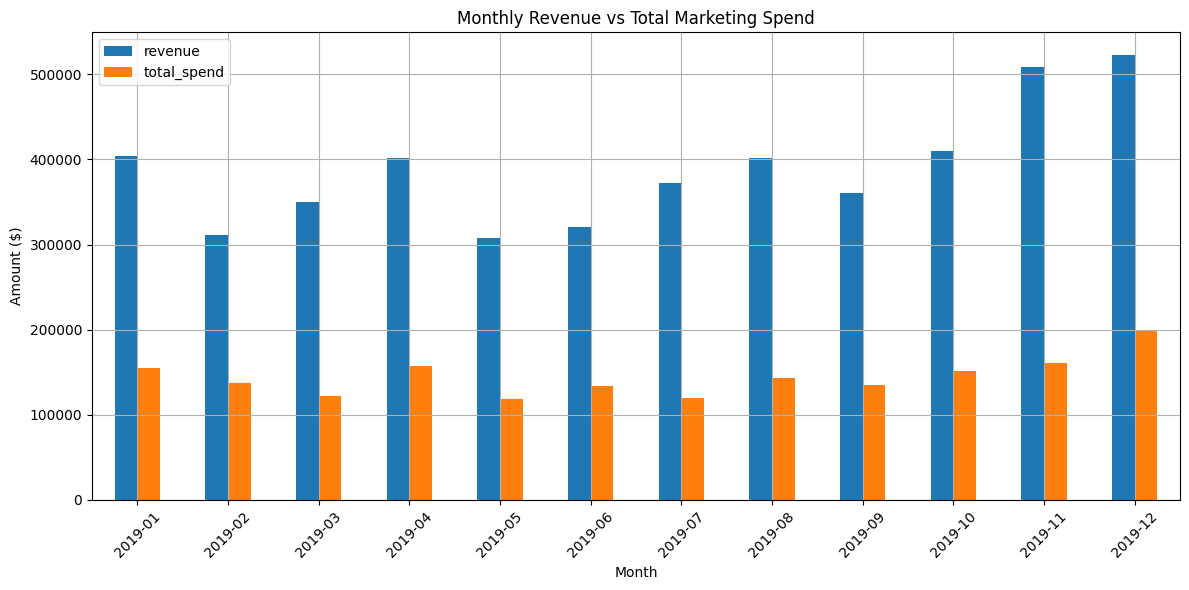

In [39]:
monthly_metrics[['revenue', 'total_spend']].plot(kind='bar', figsize=(12,6))
plt.title('Monthly Revenue vs Total Marketing Spend')
plt.ylabel('Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_revenue_vs_spend.png')
plt.show()

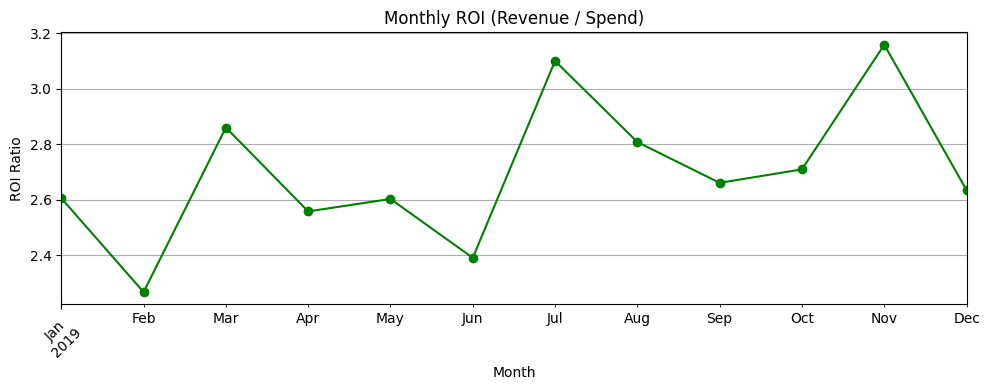

In [40]:
monthly_metrics['roi'].plot(kind='line', marker='o', figsize=(10,4), color='green')
plt.title('Monthly ROI (Revenue / Spend)')
plt.ylabel('ROI Ratio')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/monthly_roi.png')
plt.show()

### 8.2 Marketing Spend vs Revenue

We analyzed the daily marketing spend (both online and offline) and compared it with daily and monthly revenue to evaluate the effectiveness of campaigns and returns on marketing investment.

##### 🧮 Approach

- Merged daily revenue from `sales` with daily `marketing_spend` data.
- Aggregated into monthly totals for revenue and spend.
- Computed monthly ROI as: **Revenue / Total Marketing Spend**
- Visualized both **spend vs revenue** and **ROI trends**.

##### 📊 Key Findings

- **November and December** were high-investment, high-revenue months, indicating successful seasonal campaigns.
- **September** yielded strong revenue despite lower spend, showing **excellent efficiency**.
- **February and June** showed relatively **poor ROI**, suggesting campaigns in these months were **less effective**.

##### ✅ Business Recommendations

- Consider **replicating successful campaign strategies from July, September, and November**.
- Investigate **why February and June underperformed** — was it channel choice, message mismatch, or poor audience timing?
- Future budget allocations can prioritize **high-ROI months**, while optimizing or scaling down low-ROI efforts.
- Run **A/B tests in low-ROI months** to improve campaign efficiency.

All plots and calculations are stored in `/images` and `monthly_metrics` dataframe in memory.


### 8.3 Customer Segmentation using RFM

We segment customers using RFM — Recency, Frequency, and Monetary value — to identify high-value vs low-engagement groups.

##### Why This Matters:
- Helps personalize marketing
- Improves retention of high-value users
- Guides loyalty and reactivation strategies

##### Steps:
1. Calculated Recency, Frequency, and Monetary values per customer
2. Scored each on a 1–4 scale
3. Assigned RFM segments: Premium, Gold, Silver, Standard
4. Analyzed count and revenue contribution by segment

In [41]:
reference_date = sales['transaction_date'].max()

rfm = sales.groupby('customerid').agg({
    'transaction_date': lambda x: (reference_date - x.max()).days,  # Recency
    'transaction_id': 'nunique',                                    # Frequency
    'revenue': 'sum'                                                # Monetary
}).reset_index()

rfm.columns = ['customerid', 'recency', 'frequency', 'monetary']

In [42]:
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, labels=[1,2,3,4]).astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4]).astype(int)

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)


In [43]:
def assign_segment(row):
    if row['rfm_score'] >= '444':
        return 'Premium'
    elif row['rfm_score'] >= '343':
        return 'Gold'
    elif row['rfm_score'] >= '233':
        return 'Silver'
    else:
        return 'Standard'

rfm['segment'] = rfm.apply(assign_segment, axis=1)

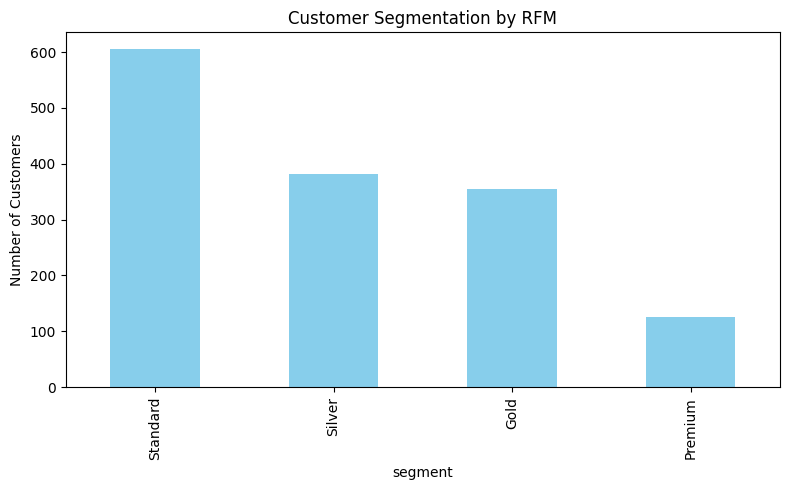

In [44]:
segment_summary = rfm['segment'].value_counts().sort_values(ascending=False)
segment_summary.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Customer Segmentation by RFM')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('../images/rfm_segment_distribution.png')
plt.show()


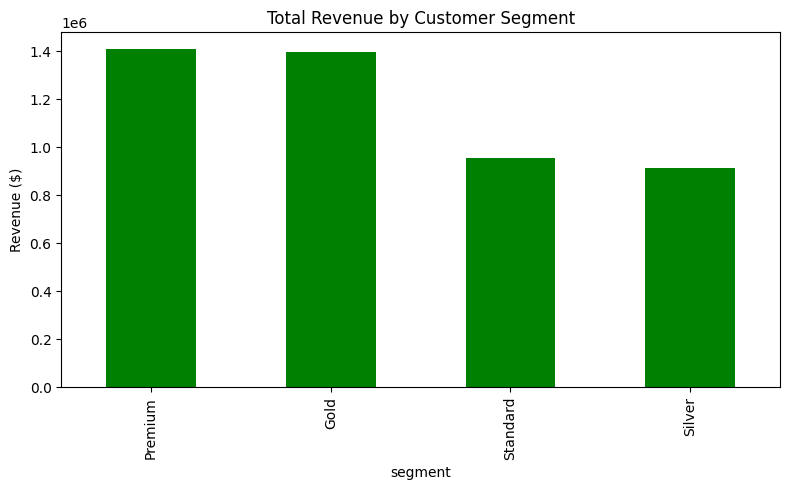

In [45]:
revenue_by_segment = rfm.groupby('segment')['monetary'].sum().sort_values(ascending=False)
revenue_by_segment.plot(kind='bar', figsize=(8,5), color='green')
plt.title('Total Revenue by Customer Segment')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('../images/rfm_segment_revenue.png')
plt.show()

### 8.3 Customer Segmentation using RFM

We performed RFM (Recency, Frequency, Monetary) analysis to segment customers based on purchase behavior.

#### Segmentation Results:

| Segment  | # Customers | Total Revenue | Strategy |
|----------|-------------|----------------|----------|
| Premium  | Fewest      | Highest        | Loyalty & VIP perks |
| Gold     | Mid-size    | High           | Upsell & retention |
| Silver   | Mid-size    | Moderate       | Re-engagement campaigns |
| Standard | Largest     | Lowest         | Onboarding & nurturing |

#### 📊 Observations:

- **Premium customers (top RFM scores)** are small in number but contribute **most revenue**.
- **Standard segment** makes up nearly **40%+ of the base** but contributes **lowest revenue**, revealing an opportunity.
- The **Revenue vs Customer Count imbalance** reinforces the need to **treat segments differently**.

#### ✅ Business Recommendations:

- Run **exclusive loyalty offers** or early access events for **Premium** customers.
- Design **upsell/cross-sell paths** for **Gold** customers (e.g., bundle deals, premium plans).
- Use **retargeting and incentives** (e.g., coupons, free shipping) for **Silver**.
- For **Standard**, implement **personalized journeys** to onboard them into more frequent use — like product education, email flows, or time-based discount nudges.



### 8.4 Cohort Retention Analysis

We grouped customers by their **month of first purchase (cohort month)** and tracked how many of them continued purchasing in the months that followed.

#### 🔁 Method:
- Created a retention matrix:  
  Rows = Acquisition month  
  Columns = Months since acquisition
- Visualized using a heatmap

#### 📊 Observations:
- **Jan–March cohorts** had **stronger retention** over time, with several customers still active after 6+ months.
- **Retention drops sharply** after the first month across all cohorts — a typical e-commerce pattern.
- **Later cohorts (e.g., Oct–Dec)** show lower retention, possibly due to less time elapsed or seasonal/new customer churn.

#### ✅ Business Recommendations:
- Study behavior of **high-retention cohorts** (Jan–Mar): were they driven by strong campaigns, better onboarding, or high-value products?
- For newer cohorts with low retention, implement **post-purchase engagement** — e.g., loyalty emails, reminder nudges, and repeat-buy discounts.
- Consider **drip journeys** triggered after first purchase to maximize **2nd and 3rd month retention**.


### 8.5 Customer Lifetime Value by Acquisition Month

In [46]:
sales['acquisition_month'] = sales.groupby('customerid')['transaction_date'].transform('min').dt.to_period('M')

ltv = sales.groupby(['acquisition_month'])['revenue'].sum().reset_index()
ltv.columns = ['acquisition_month', 'total_ltv']

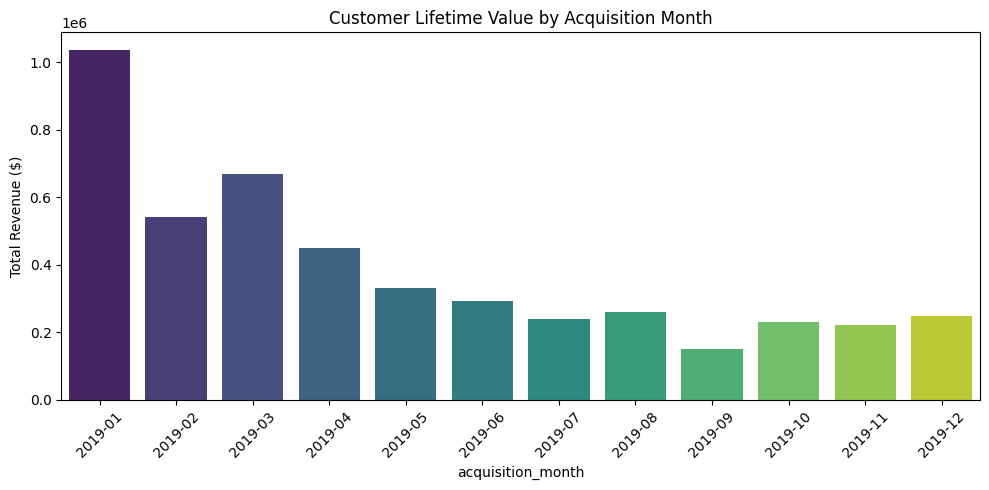

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='acquisition_month', y='total_ltv', data=ltv, hue='acquisition_month', palette='viridis', legend=False)
plt.title('Customer Lifetime Value by Acquisition Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/ltv_by_cohort.png')
plt.show()

### 8.5 Customer Lifetime Value (LTV) by Acquisition Month

We analyzed the total revenue generated by customers grouped by their acquisition month, representing the **Customer Lifetime Value (LTV)** from each cohort.

#### 🔍 Observations:

- **January 2019** customers generated the **highest total revenue**, crossing $1M in LTV — likely due to longer time in system and strong onboarding.
- **March** also stands out with a high LTV, suggesting strong campaign or product timing.
- A **steady decline** is visible across later months, with **post-July cohorts** contributing much lower LTV — possibly due to reduced retention or shorter time elapsed.

#### 💡 Recommendations:

- Investigate **campaigns and product mixes** from Q1 (Jan–Mar), and consider replicating their structure in future acquisition efforts.
- For low-LTV cohorts (e.g., Sep–Nov), implement **re-engagement strategies** to extend customer lifecycle.
- Consider tying **LTV insights to CAC (Customer Acquisition Cost)** if available, to optimize marketing ROI.
- Reassess recent cohorts (Nov–Dec) in a few months to evaluate longer-term value.



### 8.6 Delivery Charges & Tax Impact Analysis

In [48]:
sales['delivery_bucket'] = pd.cut(sales['delivery_charges'],
                                  bins=[-0.1, 5, 10, 15, 20, sales['delivery_charges'].max()],
                                  labels=['0-5', '5-10', '10-15', '15-20', '20+'])

# Aggregate
delivery_impact = sales.groupby('delivery_bucket').agg({
    'quantity': 'mean',
    'revenue': 'mean',
    'transaction_id': 'count'
}).rename(columns={
    'quantity': 'Avg Quantity',
    'revenue': 'Avg Revenue',
    'transaction_id': 'Num Orders'
}).reset_index()

display(delivery_impact)

/var/folders/mk/ckqdlgh95wq9b4rbznzvfm4w0000gn/T/ipykernel_51686/2049375862.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_impact = sales.groupby('delivery_bucket').agg({


,delivery_bucket,Avg Quantity,Avg Revenue,Num Orders
0,0-5,1.314815,120.661975,162
1,5-10,3.133529,87.509105,43017
2,10-15,6.218404,78.726242,4423
3,15-20,7.616053,92.455930,1956
4,20+,18.010695,106.303690,3366


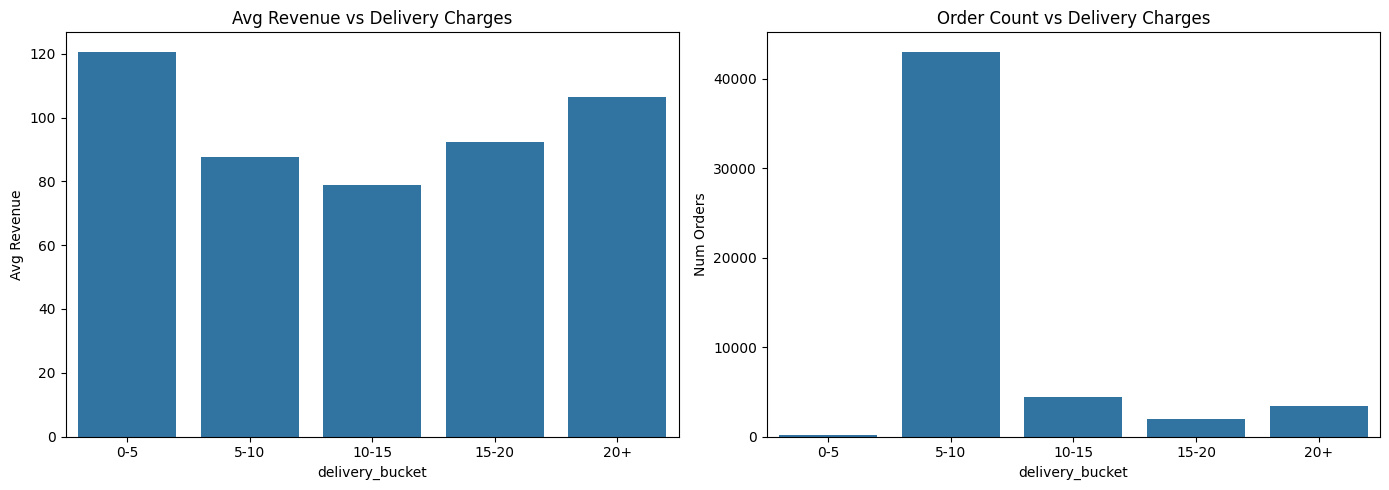

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='delivery_bucket', y='Avg Revenue', data=delivery_impact, ax=ax[0])
ax[0].set_title('Avg Revenue vs Delivery Charges')

sns.barplot(x='delivery_bucket', y='Num Orders', data=delivery_impact, ax=ax[1])
ax[1].set_title('Order Count vs Delivery Charges')

plt.tight_layout()
plt.savefig('../images/delivery_impact.png')
plt.show()

In [50]:
# Merge tax rates to sales
sales_taxed = sales.merge(tax, how='left', on='product_category')
sales_taxed.columns


Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'transaction_month', 'revenue',
       'total_amount', 'acquisition_month', 'cohort_index', 'customer_type',
       'coupon_used', 'month', 'discount_pct', 'delivery_bucket', 'gst'],
      dtype='object')

In [51]:
gst_impact = sales_taxed.groupby('gst').agg({
    'quantity': 'sum',
    'revenue': 'sum',
    'transaction_id': 'nunique'
}).rename(columns={
    'quantity': 'Total Units Sold',
    'revenue': 'Total Revenue',
    'transaction_id': 'Order Count'
}).reset_index()

display(gst_impact)

,gst,Total Units Sold,Total Revenue,Order Count
0,0.05,18222,705208.37,3585
1,0.10,112112,2928107.26,15510
2,0.12,2484,4637.32,122
3,0.18,105215,1032841.67,10880


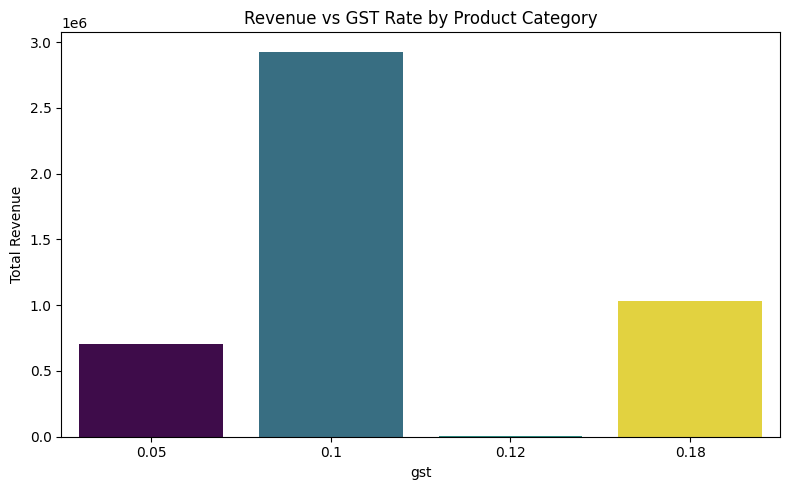

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x='gst', y='Total Revenue', data=gst_impact, hue='gst', legend=False, palette='viridis')
plt.title('Revenue vs GST Rate by Product Category')
plt.tight_layout()
plt.savefig('../images/gst_vs_revenue.png')
plt.show()

### 8.6 Impact of Delivery Charges and GST on Order Behavior

We explored how **delivery pricing** and **product category tax rates (GST)** affect customer purchase patterns.

---

#### 🚚 Delivery Charges Analysis

We grouped transactions by delivery charge tiers and analyzed:

- **Avg Revenue per Order**
- **Order Volume**

Findings:
- Most orders cluster in the **5–10 range**, with revenue per order relatively stable.
- **Very high delivery charges (15+)** are rare and show **lower order volume**, suggesting price sensitivity.

✅ **Suggestion**: 
- Keep delivery charges within **5–10** range for optimal order rates.
- Consider offering **free delivery thresholds** or tiered discounts to drive larger baskets.

---

#### 💰 GST Rate Analysis

We merged product-level GST rates and grouped by tax bracket:

| GST Rate | Total Revenue | Orders | Units Sold |
|----------|---------------|--------|------------|
| 10%      | ~$2.9M        | 15.5K  | 112K       |
| 18%      | ~$1.03M       | 10.8K  | 105K       |
| 5%       | ~$705K        | 3.6K   | 18K        |
| 12%      | ~$4.6K        | 122    | 2.4K       |

Key Observations:
- Products taxed at **10% GST** drove the **highest revenue and order count**.
- **18% GST categories** still performed decently, but with lower conversion.
- **12% GST category underperformed** drastically — either due to unattractive products or pricing friction.

✅ **Suggestion**:
- Focus promotions on 10% GST categories (they convert best).
- Investigate the 12% GST segment — possibly niche, wrongly priced, or lacking visibility.
- Run **A/B tests** for high-GST products with and without visible tax breakdowns.

## 9. Conclusion

## Final Insights & Strategic Recommendations

Based on the exploratory and diagnostic analysis of sales, marketing, coupons, and customer behavior data across 2019, the following business insights and data-backed recommendations have been identified:

---

## 🧩 Acquisition & Retention

- **Highest acquisition month** was **January**, but **retention** gradually declined for newer cohorts.
- Customers acquired in **Q1 (Jan–Mar)** show the highest **Lifetime Value (LTV)**.
- Later cohorts (Aug–Nov) show weaker retention and spending, requiring re-engagement.

🔁 **Strategy**:
- Double down on acquisition during Q1, using proven successful campaigns.
- Re-target drop-offs from Q3–Q4 with loyalty or remarketing programs.

---

## 💳 Coupon Impact

- **Coupons are widely used** (17904 orders), but the **average revenue per order** is only marginally lower than orders without coupons.
- Discount tiers (10%, 20%, 30%) showed similar mean revenues — suggesting diminishing returns at higher discounts.

🎯 **Strategy**:
- Focus on **lower-tier discounts** (e.g., 10%) to maintain profitability.
- Use coupons as **acquisition hooks**, not as retention defaults.

---

## 📢 Marketing ROI

- Marketing spend was consistent, but **ROI varied month-to-month**.
- **July and November** showed **peak returns** for investment.
- February had low ROI despite substantial spending.

📈 **Strategy**:
- Shift spend from underperforming months (e.g., Feb) to high-ROI months (Jul, Nov).
- Align marketing with product launches and seasonal cycles.

---

## 🧑‍💼 Customer Segments (RFM)

- **Premium and Gold segments**, though smaller in count, drove over **50% of total revenue**.
- Standard customers dominate volume but underperform in spend.

🎯 **Strategy**:
- Create **exclusive campaigns** for high-value segments.
- Design **upsell paths** from Silver → Gold using targeted content and perks.

---

## 🚚 Delivery & Tax Sensitivity

- Most customers tolerate delivery charges **up to ₹10**. High charges reduce order volume.
- Products with **10% GST** led in revenue and units sold.  
- **12% GST category** underperformed severely — suggests pricing/product mismatch.

📦 **Strategy**:
- Cap standard delivery fees within the ₹10 range or offer thresholds for free delivery.
- Investigate or restructure product categories taxed at 12%.

---

## 💡 Overall Recommendations

- Focus on **early-year acquisition** and repeat buyer strategies.
- Use **data-backed cohort insights** to tune marketing and product bundling.
- Monitor **coupon abuse** and **adjust discounting logic**.
- Create **separate retention workflows** for each customer segment.

---